In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import plotly.express as px

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit

# Czyszczenie danych

In [2]:
df = pd.read_excel('messy_data.xlsx')
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(200, 10)


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.7,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.2,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.9,I1,J,Fair,6,,3.7,61.7,,2400


In [3]:
# Typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [4]:
# Widzimy dużo pól przechowujących pustą wartość zamiast NaN
# Zamieniamy wszystkie takie wartości na NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [5]:
# Nazwy kolumn poza pierwszą mają niepotrzebną spację z przodu, spacje w dimension zamieniam na _.
df.columns = ['carat', 'clarity', 'color', 'cut', 'x_dimension', 'y_dimension', 'z_dimension', 'depth', 'table', 'price']

In [6]:
# Nie widzę żadnych dodatkowych zmian do wprowadzenia.
# Castujemy wszystkie numeryczne kolumny na floaty.
df['clarity'] = df['clarity'].astype('str')
df['color'] = df['color'].astype('str')
df['cut'] = df['cut'].astype('str')
df['x_dimension'] = df['x_dimension'].astype('float64')
df['y_dimension'] = df['y_dimension'].astype('float64')
df['z_dimension'] = df['z_dimension'].astype('float64')
df['depth'] = df['depth'].astype('float64')
df['table'] = df['table'].astype('float64')
df['price'] = df['price'].astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        150 non-null    float64
 1   clarity      200 non-null    object 
 2   color        200 non-null    object 
 3   cut          200 non-null    object 
 4   x_dimension  197 non-null    float64
 5   y_dimension  136 non-null    float64
 6   z_dimension  152 non-null    float64
 7   depth        133 non-null    float64
 8   table        167 non-null    float64
 9   price        196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


In [8]:
# Spójność - przejdźmy przez każdą kolumnę
df['carat'].value_counts()
# Wszystko ok

0.50    13
0.55    12
0.40    10
0.45     9
1.05     8
0.65     8
0.70     8
0.75     8
0.85     7
1.30     7
0.60     7
0.90     7
1.20     6
0.95     6
1.40     5
1.15     5
1.25     4
0.80     4
0.35     4
1.10     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: carat, dtype: int64

In [9]:
df['clarity'].value_counts()

 i1      26
 si2     23
 VVS1    23
 IF      20
 VVS2    19
 vvs2    18
 si1     18
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      5
 if       3
 Vvs1     1
Name: clarity, dtype: int64

In [10]:
#Istnieją niespójności w kapitalizacji. Zmieniam wszystko na lowercase
df['clarity'] = df['clarity'].str.lower()
df['clarity'].value_counts()

 si2     44
 vvs2    37
 vvs1    35
 i1      31
 si1     30
 if      23
Name: clarity, dtype: int64

In [11]:
df['color'].value_counts()

 G            36
 I            33
 H            30
 F            24
 D            13
 E            13
 e            12
 d             9
 f             6
 j             6
 colorless     6
 h             4
 g             4
 J             2
 Colorless     2
Name: color, dtype: int64

In [12]:
# To samo, kapitalizacja na lowercase
df['color'] = df['color'].str.lower()
df['color'].value_counts()

 g            40
 h            34
 i            33
 f            30
 e            25
 d            22
 j             8
 colorless     8
Name: color, dtype: int64

In [13]:
df['cut'].value_counts()

 Premium      34
 Good         30
 fair         24
 Ideal        23
 good         21
 very good    19
 Fair         12
 Very good    10
 ideal         9
 Very Good     9
 premium       7
 very Good     2
Name: cut, dtype: int64

In [14]:
# Znowu kapitalizacja
df['cut'] = df['cut'].str.lower()
df['cut'].value_counts()

 good         51
 premium      41
 very good    40
 fair         36
 ideal        32
Name: cut, dtype: int64

In [15]:
df['x_dimension'].value_counts()
# OK

5.9    11
6.9    10
5.6    10
5.7    10
6.8     9
4.8     9
6.4     9
6.3     9
6.6     9
5.5     8
5.3     8
5.2     7
6.5     7
6.1     7
5.4     7
6.0     7
6.7     7
6.2     6
5.8     6
5.1     6
4.9     6
7.1     5
4.7     5
4.5     3
4.6     3
7.2     3
7.0     3
7.3     2
4.4     2
4.3     2
3.9     1
Name: x_dimension, dtype: int64

In [16]:
df['y_dimension'].value_counts()
# OK

5.58    4
5.49    4
5.89    3
4.79    3
6.52    3
       ..
6.32    1
5.23    1
6.51    1
4.77    1
6.43    1
Name: y_dimension, Length: 89, dtype: int64

In [17]:
df['z_dimension'].value_counts()
# OK

4.21    6
3.90    6
3.97    5
3.35    4
3.78    4
       ..
2.95    1
4.13    1
4.30    1
2.97    1
4.23    1
Name: z_dimension, Length: 78, dtype: int64

In [18]:
df['depth'].value_counts()
# OK

62.3    17
62.1    17
62.4    16
62.5    14
62.6    14
62.7    14
62.2    14
62.8     6
62.0     6
61.9     3
61.7     3
61.5     2
61.8     2
61.6     2
61.3     1
61.2     1
63.0     1
Name: depth, dtype: int64

In [19]:
df['table'].value_counts()
# OK

56.0    39
58.0    39
57.0    38
59.0    23
55.0    17
54.0    10
60.0     1
Name: table, dtype: int64

In [20]:
df['price'].value_counts()

2600.0      7
2500.0      5
2100.0      5
3100.0      5
2200.0      5
           ..
1100.0      1
1300.0      1
4700.0      1
1900.0      1
150000.0    1
Name: price, Length: 89, dtype: int64

In [21]:
# Potencjalna wartość odstająca 150000
# Szukamy więcej podobnych odstających o price >= 10000
df.loc[df['price'] >= 10000]

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
21,1.30,si1,g,premium,6.9,NaN,4.30,63.0,60.0,10500.0
22,1.40,if,d,good,7.1,7.12,NaN,62.4,59.0,11000.0
31,1.50,vvs2,f,good,7.2,7.18,NaN,62.7,59.0,10800.0
51,1.40,vvs2,h,good,7.1,NaN,4.39,62.7,59.0,11200.0
73,1.20,vvs1,e,premium,6.8,NaN,4.20,62.7,58.0,10200.0
92,1.25,if,g,ideal,6.8,NaN,4.21,NaN,59.0,10300.0
97,1.40,vvs1,e,premium,7.1,NaN,4.40,62.7,58.0,11500.0
113,1.20,vvs2,g,fair,6.9,6.89,NaN,62.8,54.0,10100.0
127,1.25,si2,d,good,6.9,NaN,4.26,NaN,58.0,10400.0


In [22]:
# Widać, że jest kilka wartości odstających mocno od pozostałych. Usuwam.
df = df[df["price"] < 150000.0]

In [23]:
df['price'].value_counts()

2600.0    7
2500.0    5
7900.0    5
3100.0    5
2100.0    5
         ..
3700.0    1
5000.0    1
900.0     1
1100.0    1
4900.0    1
Name: price, Length: 84, dtype: int64

In [24]:
# Duplikaty
print(f'Suma duplikatów: {df.duplicated().sum()}')
df.duplicated()

# Nie ma duplikatów w całym dataframie

Suma duplikatów: 0


0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
198    False
199    False
Length: 191, dtype: bool

In [25]:
# Potencjalna kolumna do zignorowania to cena.
duplicates = df.duplicated(subset=['carat', 'clarity', 'color', 'cut', 'x_dimension', 'y_dimension', 'z_dimension', 'depth', 'table'],
                           keep=False)

df[duplicates]
# Wciąż widać brak duplikatów. Za mało informacji o kontekście datasetu do wykluczenia większej ilości kolumn

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price


In [26]:
# Wartości brakujące
print(f'Ilość wierszy z brakującymi wartościami: {df.isna().any(axis=1).sum()}')
# Prawie wszystkie wiersze mają brakujące wartości, nie można ich po prostu usunąć

Ilość wierszy z brakującymi wartościami: 186


In [27]:
for column in df.select_dtypes(include='number').columns:
    mean = df[column].mean()
    df[column].fillna(value=mean, inplace=True)

In [28]:
print(f'Ilość wierszy z brakującymi wartościami: {df.isna().any(axis=1).sum()}')

Ilość wierszy z brakującymi wartościami: 0


In [29]:
# Skalowanie
scaler = MinMaxScaler()
for column in df.select_dtypes(include='number').columns:
    if column != 'price':
        df[column] = scaler.fit_transform(df[[column]])
        
df.head()

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.214286,if,d,ideal,0.352941,0.371681,0.377990,0.166667,0.477987,3000.0
1,0.357143,vvs2,e,premium,0.529412,0.580063,0.531100,0.444444,0.833333,4500.0
2,0.426108,si2,h,good,0.117647,0.123894,0.617687,0.611111,0.333333,700.0
3,0.714286,if,d,ideal,0.585745,0.864307,0.856459,0.277778,0.666667,10000.0
4,0.500000,i1,j,fair,0.617647,0.580063,0.617225,0.277778,0.477987,2400.0


In [30]:
df.to_csv('clean_data.csv')

# Wizualizacja danych 

In [34]:
# Liczność kategorii - Histogram

#hist = px.histogram(df, 'carat')
hist = px.histogram(df, 'clarity', color='clarity')
#hist = px.histogram(df, 'color')
#hist = px.histogram(df, 'cut')
#hist = px.histogram(df, 'x_dimension')
#hist = px.histogram(df, 'y_dimension')
#hist = px.histogram(df, 'z_dimension')
#hist = px.histogram(df, 'depth')
#hist = px.histogram(df, 'table')
#hist = px.histogram(df, 'price')
hist.show()

In [32]:
#fig = px.line(df.sort_values(by='carat'), x='carat', y='price', markers=True)
#fig = px.box(df, x='clarity', y='price')
#fig = px.box(df, x='color', y='price')
fig = px.box(df, x='cut', y='price')
#fig = px.line(df.sort_values(by='x_dimension'), x='x_dimension', y='price', markers=True)
#fig = px.line(df.sort_values(by='y_dimension'), x='y_dimension', y='price', markers=True)
#fig = px.line(df.sort_values(by='z_dimension'), x='z_dimension', y='price', markers=True)
#fig = px.line(df.sort_values(by='depth'), x='depth', y='price', markers=True)
#fig = px.box(df, x='table', y='price')


fig.show()

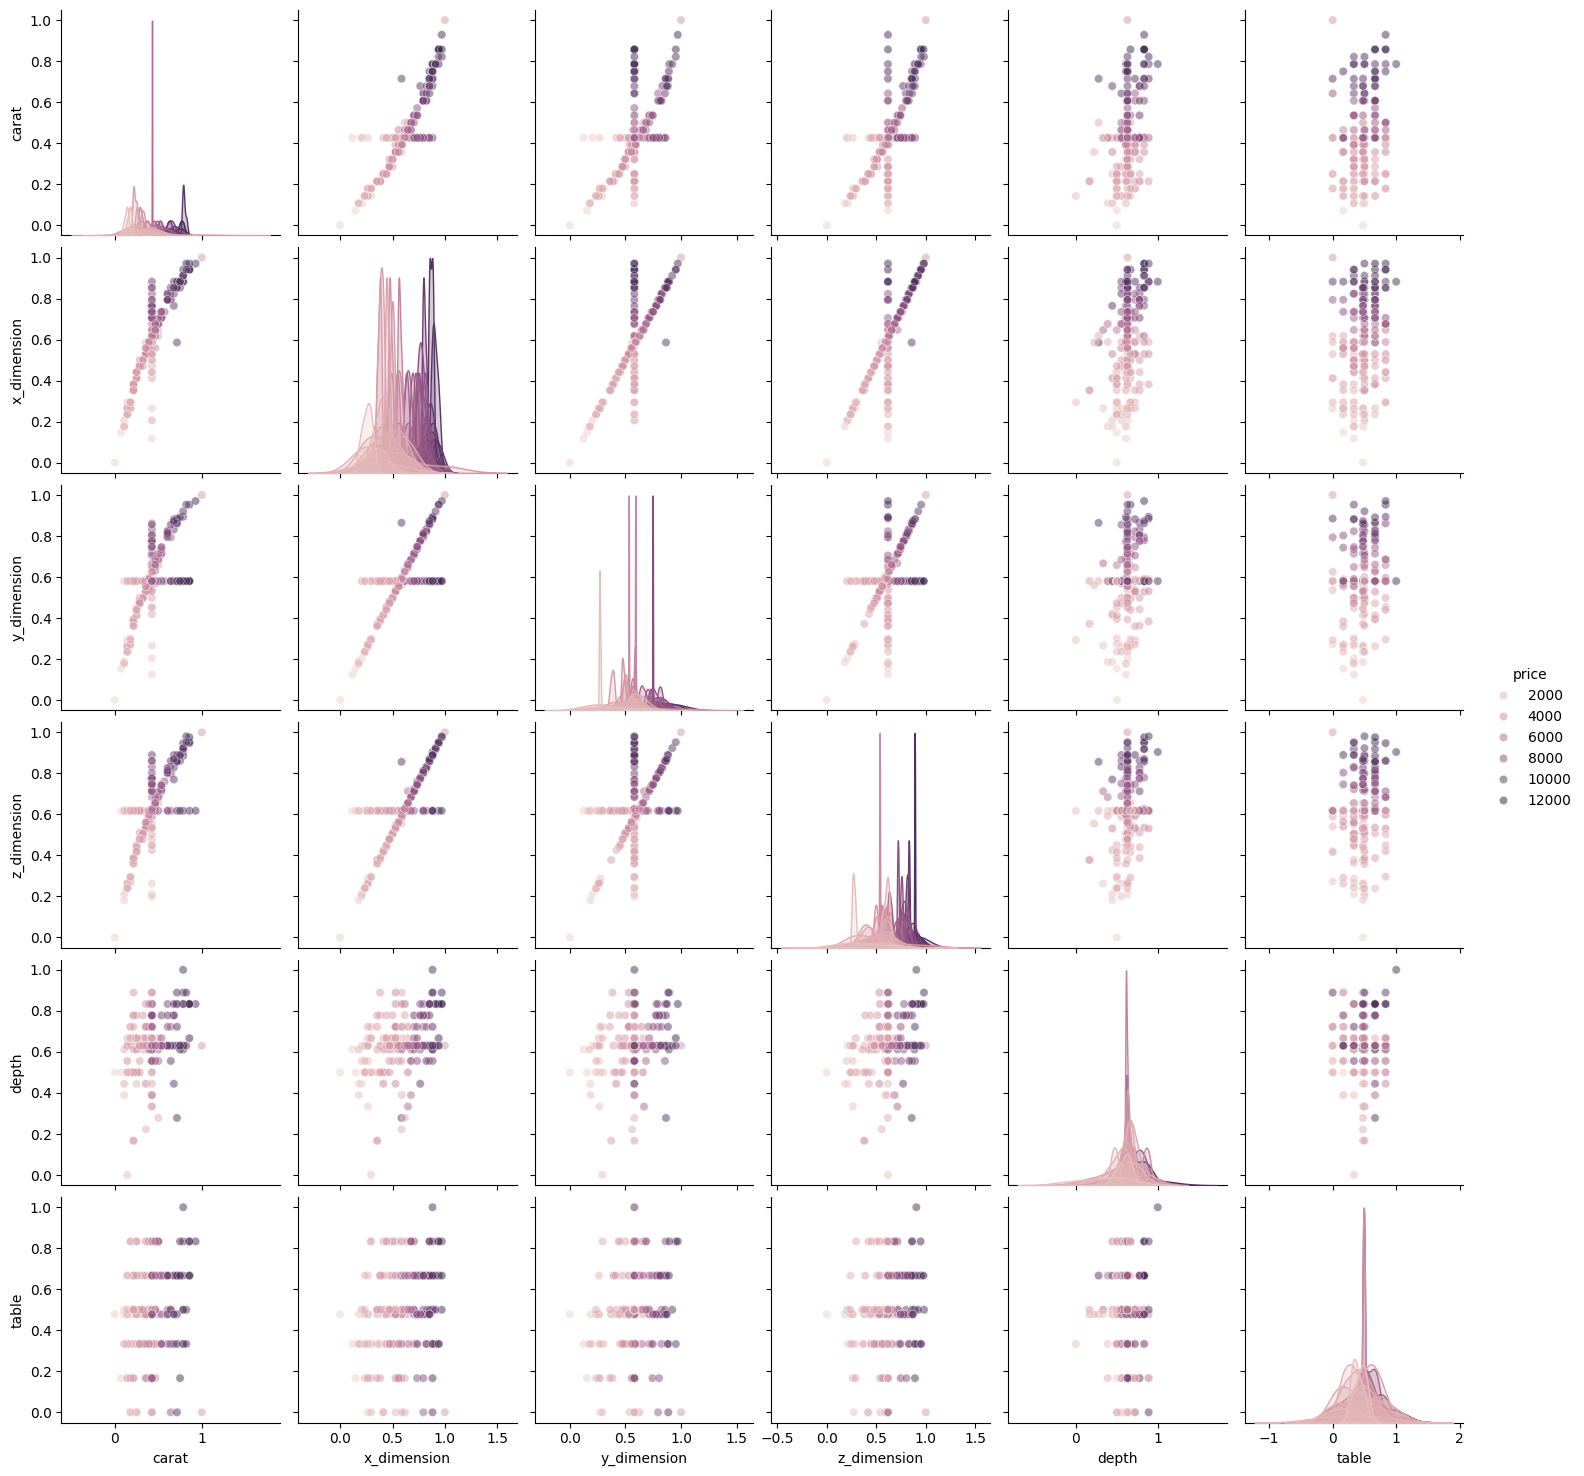

In [128]:
sns.pairplot(data=df, hue='price', plot_kws={'alpha': 0.5})

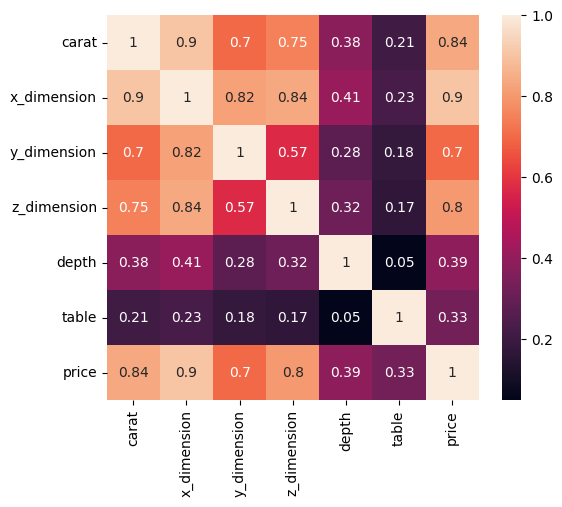

In [35]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(6,5))
heatmap = sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [36]:
df.head()

,carat,clarity,color,cut,x_dimension,y_dimension,z_dimension,depth,table,price
0,0.214286,if,d,ideal,0.352941,0.371681,0.377990,0.166667,0.477987,3000.0
1,0.357143,vvs2,e,premium,0.529412,0.580063,0.531100,0.444444,0.833333,4500.0
2,0.426108,si2,h,good,0.117647,0.123894,0.617687,0.611111,0.333333,700.0
3,0.714286,if,d,ideal,0.585745,0.864307,0.856459,0.277778,0.666667,10000.0
4,0.500000,i1,j,fair,0.617647,0.580063,0.617225,0.277778,0.477987,2400.0


# Tworzenie modelu

In [195]:
#Konwersja kolumn tekstowych na wartości numeryczne
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

## Eliminacja wsteczna

In [196]:
# Wybór cech eliminacją wsteczną
# 1. Tworzymy model ze wszystkimi zmiennymi
model = smf.ols(formula='price ~ carat + clarity + color + cut + x_dimension + y_dimension + z_dimension + depth + table', data=df).fit()
model.summary()

#Najwyższe P dla depth (0.634)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     126.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.48e-73
Time:                        18:04:32   Log-Likelihood:                -1617.6
No. Observations:                 191   AIC:                             3255.
Df Residuals:                     181   BIC:                             3288.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3550.4452    589.987     -6.018      0.000   -4714.581   -2386.309
carat        3017.9867   1008.293      2.993      0.003    1028.466    5007.508
clarity       246.7360     54.411      4.535      0.000     139.374     354.098
color         -38.1128     48.953     -0.779      0.437    -134.705      58.479
cut           144.5178     64.606      2.237      0.027      17.040     271.996
x_dimension  9135.6469   1464.157      6.240      0.000    6246.636     1.2e+04
y_dimension  -728.0422    879.767     -0.828      0.409   -2463.961    1007.877
z_dimension  1483.8280    910.102      1.630      0.105    -311.945    3279.601
depth         330.1932    691.343      0.478      0.634   -1033.936    1694.322
table        1393.2829    428.882      3.249      0.001     547.032    2239.534
==============================================================================
Omnibus:                       30.451   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.428
Skew:                          -0.574   Prob(JB):                     2.57e-22
Kurtosis:                       6.343   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# 1. Model bez depth
model = smf.ols(formula='price ~ carat + clarity + color + cut + x_dimension + y_dimension + z_dimension + table', data=df).fit()
model.summary()

# Największe P dla color (0.463)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     142.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.15e-74
Time:                        18:05:32   Log-Likelihood:                -1617.7
No. Observations:                 191   AIC:                             3253.
Df Residuals:                     182   BIC:                             3283.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3391.5238    486.169     -6.976      0.000   -4350.776   -2432.272
carat        3041.6237   1004.940      3.027      0.003    1058.792    5024.455
clarity       250.7965     53.629      4.676      0.000     144.982     356.611
color         -35.6982     48.588     -0.735      0.463    -131.566      60.170
cut           145.6751     64.424      2.261      0.025      18.562     272.789
x_dimension  9265.8389   1435.504      6.455      0.000    6433.468    1.21e+04
y_dimension  -774.2435    872.577     -0.887      0.376   -2495.910     947.423
z_dimension  1442.4001    904.036      1.596      0.112    -341.338    3226.138
table        1378.1617    426.804      3.229      0.001     536.042    2220.281
==============================================================================
Omnibus:                       31.392   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.599
Skew:                          -0.601   Prob(JB):                     8.67e-23
Kurtosis:                       6.365   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# 1. Model bez depth, color
model = smf.ols(formula='price ~ carat + clarity + cut + x_dimension + y_dimension + z_dimension + table', data=df).fit()
model.summary()

# Największe P dla y_dimension (0.379)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     163.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.10e-75
Time:                        18:06:07   Log-Likelihood:                -1618.0
No. Observations:                 191   AIC:                             3252.
Df Residuals:                     183   BIC:                             3278.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3572.3614    418.732     -8.531      0.000   -4398.525   -2746.198
carat        3096.0492   1000.945      3.093      0.002    1121.172    5070.926
clarity       255.8219     53.124      4.816      0.000     151.007     360.637
cut           151.5302     63.849      2.373      0.019      25.556     277.504
x_dimension  9252.0473   1433.576      6.454      0.000    6423.585    1.21e+04
y_dimension  -768.0211    871.438     -0.881      0.379   -2487.378     951.336
z_dimension  1428.5431    902.702      1.583      0.115    -352.498    3209.584
table        1402.0047    425.033      3.299      0.001     563.410    2240.599
==============================================================================
Omnibus:                       32.699   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.434
Skew:                          -0.605   Prob(JB):                     2.33e-25
Kurtosis:                       6.576   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
# 1. Model bez depth, color, y_dimension
model = smf.ols(formula='price ~ carat + clarity + cut + x_dimension + z_dimension + table', data=df).fit()
model.summary()

# Wszystkie P poniżej 0.05, koniec eliminacji

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           3.16e-76
Time:                        18:06:46   Log-Likelihood:                -1618.4
No. Observations:                 191   AIC:                             3251.
Df Residuals:                     184   BIC:                             3274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3771.7293    352.155    -10.710      0.000   -4466.511   -3076.948
carat        3230.8059    988.598      3.268      0.001    1280.362    5181.250
clarity       256.6890     53.083      4.836      0.000     151.960     361.418
cut           153.6819     63.763      2.410      0.017      27.881     279.483
x_dimension  8416.5759   1074.750      7.831      0.000    6296.158    1.05e+04
z_dimension  1710.2020    843.724      2.027      0.044      45.584    3374.820
table        1412.9343    424.594      3.328      0.001     575.236    2250.633
==============================================================================
Omnibus:                       36.543   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.774
Skew:                          -0.693   Prob(JB):                     1.80e-28
Kurtosis:                       6.760   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='x_dimension', ylabel='price'>

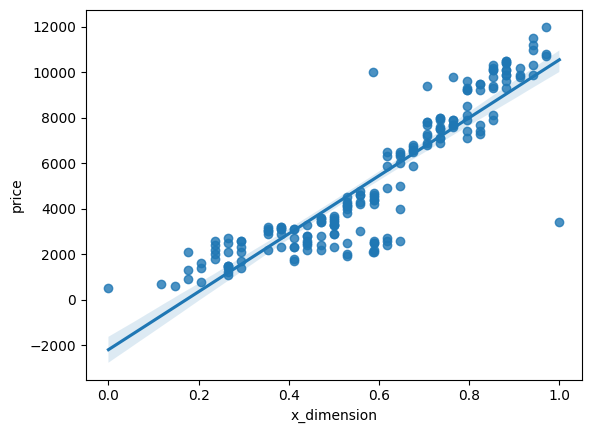

In [38]:
sns.regplot(x='x_dimension', y='price', data=df)

## Przykładowy random forest

In [202]:
df_be = df[['carat', 'clarity', 'cut', 'x_dimension', 'z_dimension', 'table', 'price']]

# Próbka kontrolna, pełny dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], 
                                                            test_size=0.2, random_state=42)

# Backwards selection
X_train_be, X_test_be, y_train_be, y_test_be = train_test_split(df_be.drop('price', axis=1), df_be['price'], 
                                                            test_size=0.2, random_state=42)



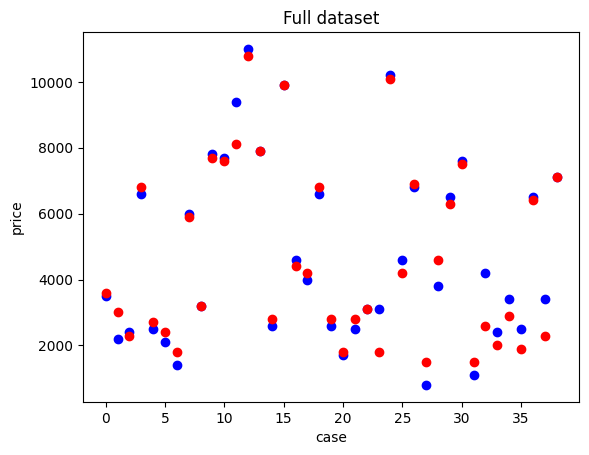

Full dataset error sum: 13700.0


In [203]:
# Model na pełnym datasecie
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_range = max(int(max(y_test)), int(max(y_pred)))
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('Full dataset')
plt.ylabel('price')
plt.xlabel('case')
plt.show()

error_sum=0
for index, i in enumerate(y_test):
    error_sum += abs(i - y_pred[index])
print(f'Full dataset error sum: {error_sum}')

In [210]:
fig = px.scatter(
    df, x='carat', y='price', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', color='cut'
)
fig.show()

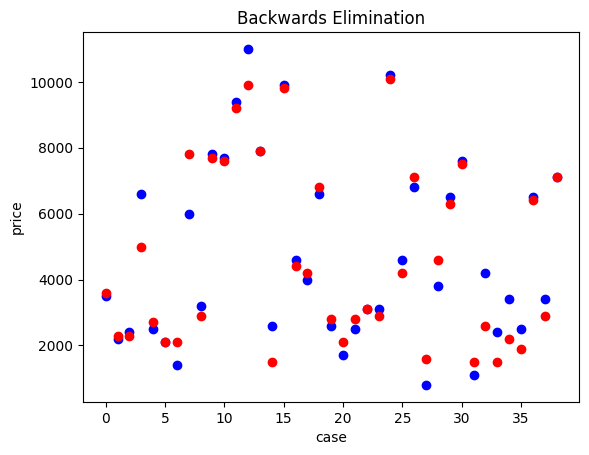

Filtered dataset error sum: 17300.0


In [204]:
# Model na datasecie po eliminacji wstecznej
model_be = RandomForestClassifier(random_state=0).fit(X_train_be, y_train_be)
y_pred_be = model_be.predict(X_test_be)

plot_range = max(int(max(y_test_be)), int(max(y_pred_be)))
plt.scatter(range(len(y_test_be)), y_test_be, color='blue')
plt.scatter(range(len(y_pred_be)), y_pred_be, color='red')
plt.title('Backwards Elimination')
plt.ylabel('price')
plt.xlabel('case')
plt.show()

error_sum_be=0
for index, i in enumerate(y_test_be):
    error_sum_be += abs(i - y_pred_be[index])
print(f'Filtered dataset error sum: {error_sum_be}')

In [160]:
df1 = [[1], [4], [10]]
df2 = [[5], [10], [0]]

error_sum=0
for index, i in enumerate(y_test):
    error_sum += abs(i - y_pred[index])
error_sum

13700.0